# K Means Clustering with Market Segmentation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('3.12. Example.csv')

In [3]:
# this data is from retail shop and there are 30 observations
# each observation is a client and have a score for their satisfaction and loyalty
# satisfaction is self-reported and this type of data is discrete and range from 1 to 10
# loyalty is no widely accepted technique to measure it
# but there are proxies like churn rate, retention rate or customer lifetime value(CLV)
# in this data, the loyalty is from purchases for 1 year + other factors
# and the loyalty range is from -2.5 to 2.5 as the variable is already standardized

data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


Text(0, 0.5, 'Loyalty')

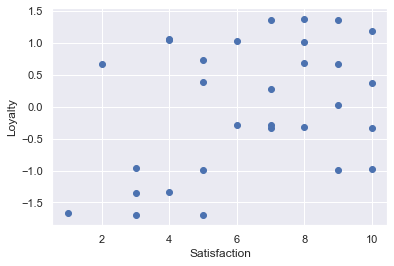

In [4]:
# from this plot it can divide into four squares
# low satisfaction low loyalty
# low satisfaction high loyalty
# high satisfaction low loyalty
# high satisfaction high loyalty

plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [5]:
x = data.copy()

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
# the column cluster_pred of clusters will contain the predictions

clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Text(0, 0.5, 'Loyalty')

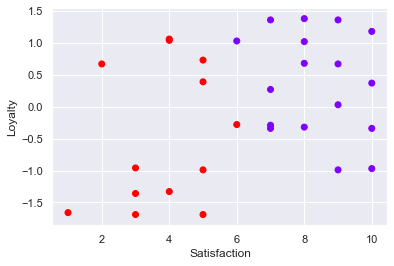

In [8]:
# through this plot, it can know there is a cut line of the satisfaction value of 6
# most probably the algorithm only considered satisfaction as a feature
# cause this result because the satisfaction variable is not standardize
# so the satisfaction values are much higher than those of loyalty
# so the k means more or less disregarded loyalty as a feature
# whenever we cluster on the basis of a single feature, the result looks like this graph
# the satisfaction and loyalty is the same important
# so in order to fixed this problem, it need to standardizing the satisfaction

plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c = clusters['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [9]:
from sklearn import preprocessing

In [10]:
# each column will be standardized with respect to itself

x_scaled = preprocessing.scale(x)

In [11]:
# x_scaled contains the standardized satisfaction and the same values for loyalty

x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [12]:
# because the range is 1 to 10
# so there are 9 cluster solutions

wcss = []

for i in range(1,10):
    
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.569489487091783,
 5.441768998573449,
 4.315662464700005,
 3.687975963852466]

Text(0, 0.5, 'WCSS')

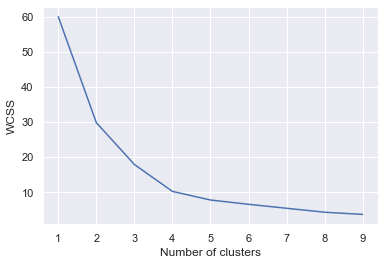

In [13]:
# with the elbow method we can see the change, but we don't really know which solution is the best one

plt.plot(range(1,10), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [14]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

In [15]:
# this contains the original values but the predicted clusters are based on standardized data
# so plot the data without standardizing the AXES but the solution will be the standardized one


clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


Text(0, 0.5, 'Loyalty')

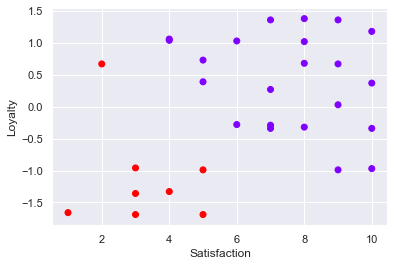

In [16]:
# keep the original x-axis we get an intuition for how satisfied were the customers
# it often choose to plot using the original values for clearer interpretability
# compare to the odd one, it can know the both dimensions were taken into account
# the one cluster is low loyalty and low satisfaction, so this peopel are alienated
# the other cluster is so heterogeneous, so it called the everything else cluster

plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [17]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,2
2,5,-0.99,1
3,7,-0.29,2
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,2
7,8,-0.32,2
8,8,1.02,2
9,8,0.68,2


Text(0, 0.5, 'Loyalty')

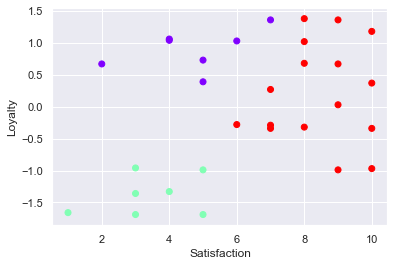

In [18]:
# with the 3 clusters it have the alienated cluster
# the everything else cluster is split into two
# so the purple cluster is supporters, they are not particularly happy with shopping experience but they like the brand and want to keep coming back and it is a small cluster
# the last cluster is called all that's left, it can't really name it, it still very much mixed

plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [19]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,0
5,1,-1.66,2
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

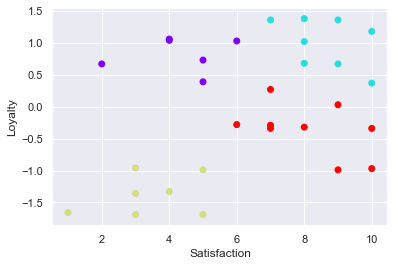

In [20]:
# it also have the alienated and supporters
# the other cluster can also be named
# the purple cluster is satisfied and loyal, so these are our fans, the core customers
# the last cluster consists of people who were predominantly satisfied but not loyal and some of them were actually disloyal, so it can called roamers

plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [21]:
kmeans_new = KMeans(5)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,4
2,5,-0.99,1
3,7,-0.29,4
4,4,1.06,3
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,4
8,8,1.02,2
9,8,0.68,2


Text(0, 0.5, 'Loyalty')

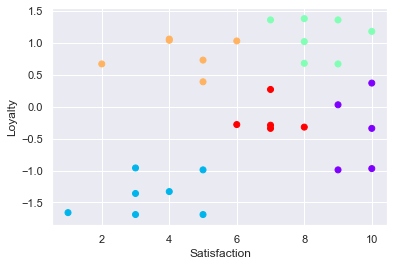

In [22]:
# with the 5 clusters
# it can know the alienated, supporters and the fans are remain unchanged
# and the purple cluster look like the roamers
# the red cluster, they almost neutral on the loyalty feature but are generally satisfied, so it also roamers
# this solution actually split the roamers into two sub clusters, those that are extremely satisfied and those that are just satisfied
# so there is not much value added to our segmentation

plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In [23]:
kmeans_new = KMeans(9)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,2
1,6,-0.28,3
2,5,-0.99,2
3,7,-0.29,3
4,4,1.06,5
5,1,-1.66,8
6,10,-0.97,6
7,8,-0.32,3
8,8,1.02,7
9,8,0.68,1


Text(0, 0.5, 'Loyalty')

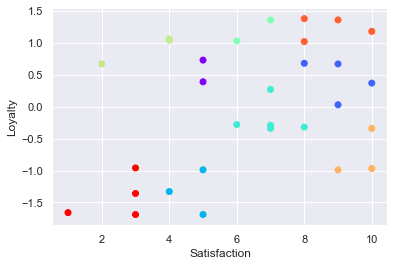

In [24]:
# it is extremely hard to name all of them and even if we do, we will probably need to use a lot of adjectives

plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c = clusters_new['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')